In [21]:
import os
import cv2
import numpy as np
from random import sample
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
from keras import Sequential, layers
from keras import Input
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Loading Images with Labels

In [3]:
image_features=[]
image_labels=[]
for celebrity in os.listdir("dataset/cropped faces"):
    image_path="dataset/cropped faces/"+celebrity

    for image in os.listdir(image_path):
        filename=image_path+'/'+image
        image=cv2.imread(filename)
        image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image=cv2.resize(image, (128,128))

        image_features.append(image)
        image_labels.append(celebrity)

In [4]:
(len(image_features), image_features[0].shape), len(image_labels)

((808, (128, 128, 3)), 808)

In [5]:
cv2.imshow('celebrity face', image_features[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

Preprocessing Labels and Splitting Data into Train and Test

In [6]:
label_encoder=LabelEncoder()
encoded_labels=label_encoder.fit_transform(image_labels)

In [7]:
xtrain, xtest, ytrain, ytest=train_test_split(np.array(image_features), np.array(encoded_labels), test_size=0.2, random_state=5)

In [8]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((646, 128, 128, 3), (646,), (162, 128, 128, 3), (162,))

Loading Face Embeddings using FaceNet model

In [23]:
from keras_facenet import FaceNet
embedder=FaceNet()

In [10]:
embedded_train_images=embedder.embeddings(xtrain)

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 439ms/step


Defining and Training Model

In [11]:
model=Sequential([
    Input(shape=(512,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [12]:
model.fit(embedded_train_images, ytrain, epochs=20)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4982 - loss: 2.2447   
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9054 - loss: 1.6563
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9390 - loss: 0.5912
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9905 - loss: 0.1434 
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9930 - loss: 0.0652
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9935 - loss: 0.0476 
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9953 - loss: 0.0321 
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9965 - loss: 0.0211 
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.0146 
Epoch 10/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 1.0000 - loss: 0.0120
Epoch 11/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0097 
Epoch 12/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [13]:
embedded_test_images=embedder.embeddings(xtest)
model.evaluate(embedded_test_images, ytest)

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9806 - loss: 0.0761 


[0.049625467509031296, 0.9876543283462524]

Testing our Face Recognition Model

In [14]:
def predict_face_names(images):
    embedded_images=embedder.embeddings(images)
    ypred=model.predict(embedded_images).argmax(axis=1)
    return label_encoder.inverse_transform(ypred)

In [15]:
ypred=model.predict(embedded_test_images).argmax(axis=1)
cm=confusion_matrix(ytest, ypred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


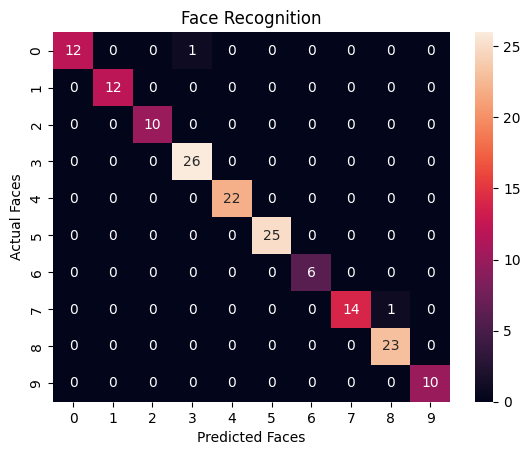

In [16]:
sns.heatmap(cm, annot=True)
plt.title('Face Recognition')
plt.xlabel('Predicted Faces')
plt.ylabel('Actual Faces')
plt.show()

In [17]:
wrong_pred=np.where(ytest!=ypred)[0]
cv2.imshow(label_encoder.inverse_transform(ytest[wrong_pred])[1], xtest[wrong_pred[1]])
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━

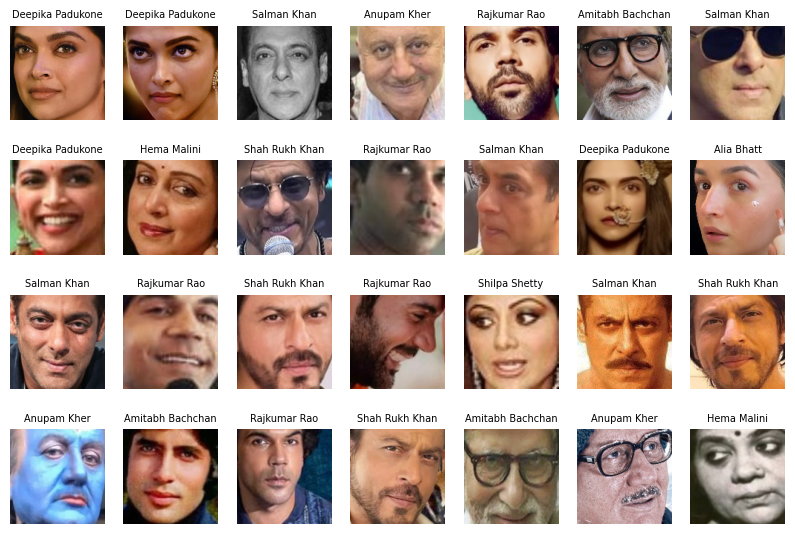

In [18]:
test_samples=sample(range(len(xtest)), k=30)
fig, axis=plt.subplots(4,7, figsize=(10,6.7))
for row in range(4):
    for col in range(7):
        test_index=test_samples[row*7+col]
        axis[row,col].set_title(predict_face_names([xtest[test_index]])[0], fontsize=7)
        axis[row,col].set_axis_off()
        axis[row,col].imshow(xtest[test_index])

Saving our trained Model

In [19]:
def save_pickle_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

In [24]:
import pickle
model.save("models/face_recognition.keras")
save_pickle_model(label_encoder, 'models/label_encoder.pickle')